In [ ]:
#To do list:
  #organize this project a little more
  #build my dense layer from scratch (in progress)
  #compare models and find the best one and think about why it performed so well


#https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/#:~:text=Sign%20up-,What%20is%20a%20Dense%20Layer%3F,in%20artificial%20neural%20network%20networks.

# Dense Layers - The most common of neural network layers

*   Below, I also build my own dense layer from scratch




# Most Basic Neural Network 


*   First, we start off with a single layer neural network, and we imporve and build on this throughout the document
*   Use a sequential
*   Only 1 layer with 1 node is needed
*   Solve for the relationship between x and y



In [ ]:
!pip install keras
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#install mnist dataset and matplotlib to show data
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline
  #magic function to show inline matplot libs


In [ ]:
#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[5 0 4]


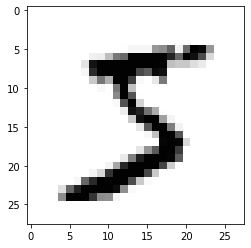

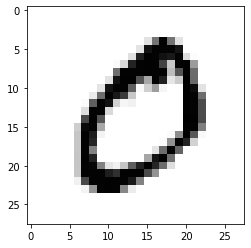

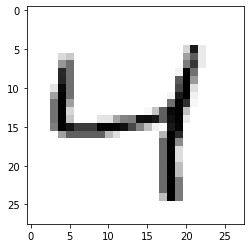

In [ ]:
image_index = 2
print(y_train[:image_index+1]) #y contains the label of the picture (if it is a 1 or 2 etc.)

for i in range(image_index+1):
  plt.imshow(x_train[i], cmap = 'Greys') #x is the container of the pictures
    #imshow reads the data as an encoded image and turns data into images
  plt.show()


In [ ]:
x_train.shape
#shape returns with tuple of the dimensions

#60,000 images that are 28 by 28 pixels


(60000, 28, 28)

In [ ]:
print(x_train[image_index][:10])
#x_train[the 3rd picture in data][1st:10th row of arrays]
  #each value in the list are 0-255 values of darkness because this dataset is monochromatic for cales 0 to 255
  #28 x 28. 28 values per row that are 0-255


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [ ]:
#Data Cleaning - pre algorithm
(x_train, y_train), (x_test, y_test) = mnist.load_data()
  #reload data

#save input image dimensions
img_rows, img_cols = 28, 28 #dimensions of the images
factorial = .99/255

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols, 1).astype('float32') #why reshape with 1?
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols, 1).astype('float32')

x_train = x_train * factorial + 0.01
x_test = x_test * factorial + 0.01

x_train.shape
#60,000 arrays where each array is made of 28 arrays (rows) where each array is another array of 28 (columns) singular values
  #data is fed into the neural network like this to run better



(60000, 784, 1)

We standardize the values by multiply by 1/255

However, we adjust this value to 0.99 and add the 0.01 later to prevent 0 values as inputs, which can prevent weight updates

In [ ]:
#Now we want to one-hot encode the labels for more accurate results

l = np.arange(10)

for label in range(10):
  one_hot = (label == l).astype(np.int)
  print("label: ", label, " in one-hot-encoding format: ", one_hot)

label:  0  in one-hot-encoding format:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot-encoding format:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot-encoding format:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot-encoding format:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot-encoding format:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot-encoding format:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot-encoding format:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot-encoding format:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot-encoding format:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot-encoding format:  [0 0 0 0 0 0 0 0 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
l = np.arange(10)
y_train_one_hot = y_train.tolist()

for i in range(len(y_train_one_hot)):
  y_train_one_hot[i] = (l == y_train_one_hot[i]).astype(float).tolist()

y_train_one_hot = np.asarray(y_train_one_hot)

y_test_one_hot = y_test.tolist()

for i in range(len(y_test_one_hot)):
  y_test_one_hot[i] = (l == y_test_one_hot[i]).astype(float).tolist()

y_test_one_hot = np.asarray(y_test_one_hot)

y_train_one_hot[y_train_one_hot==0] = 0.01
y_train_one_hot[y_train_one_hot==1] = 0.99

y_test_one_hot[y_test_one_hot==0] = 0.01
y_test_one_hot[y_test_one_hot==1] = 0.99



In [ ]:
#xset = np.array([-2, -1, 0, 1, 2], dtype = float)
#yset = np.array([-5, -3, -1, 1, 3], dtype = float)

model = Sequential(
    [
        keras.layers.Input(shape= (784,)),
        keras.layers.Dense(units=32, input_shape = (12,784,), activation = 'sigmoid', name = 'DenseLayer1'),
            #a dense layer is the traditional layer you think of what with the many connections/the web (dense)
        keras.layers.Dense(units=10,activation = 'softmax', name = 'OutputDense')

    ]
)

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
  #a stochastic gradient descent optimizer
  #loss function is defined by mean_squared_error

model.fit(x_train, y_train_one_hot, epochs = 2) #epochs is how many iterations

print(model.evaluate(x_train, y_train_one_hot, verbose = 2))




Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870
1875/1875 - 2s - loss: 0.0863 - 2s/epoch - 1ms/step
0.08630917221307755


Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DenseLayer1 (Dense)         (None, 32)                25120     
                                                                 
 OutputDense (Dense)         (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


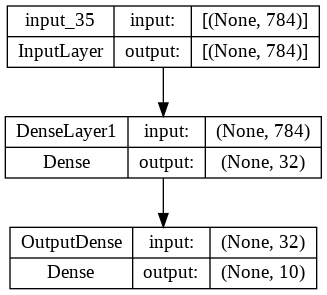

In [ ]:
model.summary()
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
model.get_config()

{'name': 'sequential_17',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'DenseLayer1_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'DenseLayer1',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 32,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_14',
    'trainable': True,
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DenseLayer1 (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Now a slightly more complex Neural Network


*   Built from a "DAG" point of view. We can add layers and nodes more explicitly as well
*   Done with keras



In [ ]:
inputs = keras.Input(shape = (None, 64, 784))

#for an image example only:
#img_inputs = keras.Input(shape - (23,23,3))

inputs.shape


TensorShape([None, None, 64, 784])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
dense = keras.layers.Dense(64, activation = "relu", name = "DenseLayer1") #relu activation just sets all negs to 0
x = dense(inputs) #here we are telling keras to essentially connect our keras.Input object to the layer we built
x #returns a Tensor object. 

<KerasTensor: shape=(None, None, 64, 64) dtype=float32 (created by layer 'DenseLayer1')>

In [ ]:
#add more layers

x = keras.layers.Dense(64, activation = "relu", name = "DenseLayer2")(x)
#this is a core, without the (x) at the end. Core must mean a solo layer with no connections
outputs = keras.layers.Dense(10, name = "OutputLayer")(x) #10 outputs or categories
outputs

<KerasTensor: shape=(None, None, 64, 10) dtype=float32 (created by layer 'OutputLayer')>

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_30 (InputLayer)       [(None, None, 64, 784)]   0         
                                                                 
 DenseLayer1 (Dense)         (None, None, 64, 64)      50240     
                                                                 
 DenseLayer2 (Dense)         (None, None, 64, 64)      4160      
                                                                 
 OutputLayer (Dense)         (None, None, 64, 10)      650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


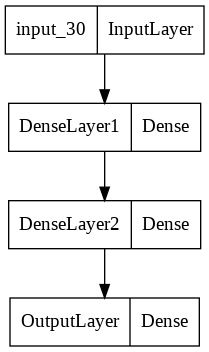

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

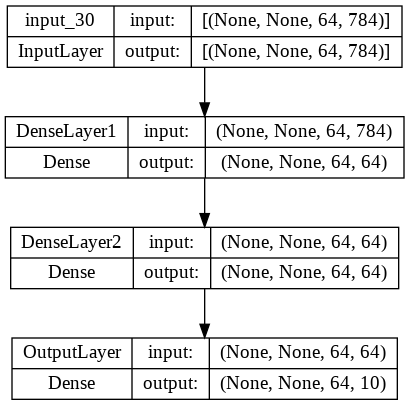

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

# Compile and test the model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load data

x_train = x_train.reshape(60000, 784).astype("float32") / 255 #reshape and cast to float
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=keras.optimizers.RMSprop(), 
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2


739/750 [============================>.] - ETA: 0s - loss: 0.3610 - accuracy: 0.8977

750/750 [==============================] - 3s 4ms/step - loss: 0.3590 - accuracy: 0.8982 - val_loss: 0.1917 - val_accuracy: 0.9455
Epoch 2/2
750/750 [==============================] - 3s 3ms/step - loss: 0.1703 - accuracy: 0.9494 - val_loss: 0.1351 - val_accuracy: 0.9606
313/313 - 0s - loss: 0.1309 - accuracy: 0.9614 - 458ms/epoch - 1ms/step
Test loss: 0.1309204399585724
Test accuracy: 0.9613999724388123


In [ ]:
#model.save("path_to_model")
#del model
#recreate
#model = keras.models.load_model("path_to_model")

In [ ]:
y = mnist.load_data()

In [ ]:
%matplotlib inline
  #magic function to show inline matplot libs

In [ ]:
import matplotlib.pyplot as plt

image_index = 4
print(y_train[image_index]) #y is the correct number

for i in range(image_index+1):
  plt.imshow(x_train[i], cmap = 'Greys') #x is the container of the pictures
    #imshow reads the data as an encoded image and turns data into images
  plt.show()


In [ ]:
x_train.shape
#shape returns with tuple of the dimensions

#60,000 images that are 28 by 28 pixels

In [ ]:
print(x_train[image_index][23])
#x_train[the number 3 pic][23rd row of arrays]
  #each value in the list are 0-255 values of darkness because this dataset is monochromatic for cales 0 to 255


In [ ]:
print(y_train[:image_index + 1])

In [ ]:
#Data Cleaning - pre algorithm
(x_train, y_train), (x_test, y_test) = mnist.load_data()
  #reload data

#save input image dimensions
img_rows, img_cols = 28, 28 #dimensions of the images

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32') #why reshape with 1?
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

#generally add a .astype("float32")

# One more model, with normalization

I normalize the values here to [0,-1] *at the input*

Alternatively, I could normalize the values to [-1,1] or to the mean and std


*   Really depends on the data and how the data should be viewed
*   For example, here we normalize from 0 to -1 because we really just want to know the shape of the object, aka whether a pixel is black or white
*   In another problem, maybe if color matters, it is better to normalize to the mean and std



In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
type(x_train[10][10][1][0])
#returns a float. Int divided by 255 turns into a float

numpy.float32

In [ ]:
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

  #turn values into categorical values rather than a continuous

**Modelling Time!**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


A sequential model is a stack of layers where each layer has a single input and output

An example:
```
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
```

Note: If model or any layers in model have multiple inputs or outputs, a sequential model isn't appropriate.

In [ ]:
model = Sequential() #create a sequential model, goes through layers sequentially

model.add(Conv2D(32, kernel_size = (3,3), #area of pixels we actually scan over in a convolution. This outputs as a max value of the area as one value
                 activation = 'relu', #rectified linear units. Max of a value or 0. 
                  #this is necessary because we need something that looks like a linear function, but is actually non-linear (since all negs are now 0)
                  #Why do we need this? Is it because relu activation starts at 0 and goes up linearly. So larger blocks of lots of positive values are favored and recognized?
                 input_shape= (img_rows, img_cols, 1))) #always needed if Conv2D is the first layer of a neural network
model.add(Conv2D(64, (3,3), 
                 activation = 'relu')) 
#2nd convolution layer
  #here we have 64 filters that the convolution layer learns from. Determines output as well
  #filters come out as a size of (3,3)

model.add(MaxPooling2D(pool_size = (2, 2)))
#pooling layer can be used for edge recognition and others
#there is also avg pooling but here we don't use that.

#when using the "valid" padding option, has a spatial shape (number of rows or columns) of: output_shape = 
#math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)The resulting output shape 
#when using the "same" padding option is: output_shape = math.floor((input_shape - 1) / strides) + 1

#in example above, dense is the layer type.
  #In my model, I am adding 2 Conv2D and one MaxPooling2D

model.add(keras.layers.Dense(10, name = "OutputLayer"))

model.add(layers.Activation('softmax'))

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

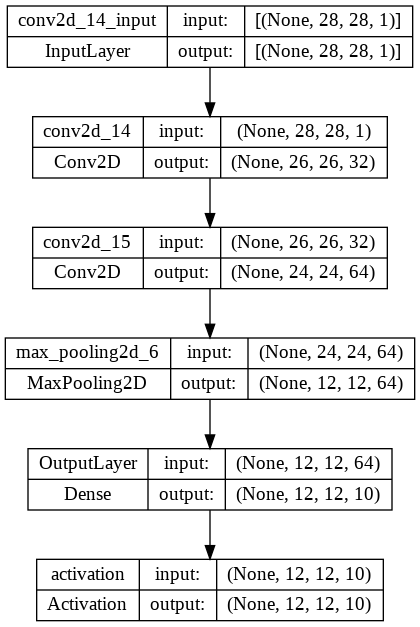

In [ ]:

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam', 
    metrics=['accuracy', 'val_accuracy']
)

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:

history = model.fit(x_train, y_train)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1875/1875 [==============================] - 24s 13ms/step - loss: 0.6108 - accuracy: 0.8353
313/313 - 1s - loss: 0.2896 - accuracy: 0.9193 - 1s/epoch - 5ms/step
Test loss: 0.2896175980567932
Test accuracy: 0.9193000197410583


# 2D convolution neural network


1.   Creates a convolution kernal that is wind with layer inputs, producing a tensor
2.   A convolution is an integral that measures overlap as one function is shifted over another. "Blends"
3.   It can be used with images for blurring, sharpening, edge detection etc.
4.   Number of filters is a power of 2(4,8,16,32,64) and kernel size is generally (1,1), (3,3), ... (7,7) - must be odd
5.   Strides is default as 1,1. We can make it 2,2 sometimes if we want to reduce output vol
6.   Dilation_rate - used for high resolution images or when details matter. Or few parameters only. use_bias is default to true





# 2D MaxPooling layer


1.   Basically if there is a 4x4 image, we can look at a 2x2 filter
2.   The filter is scanned and moves according to the "strides" input, basically reconstructing the image with less pixels, taking the max of values (hence the use for edge recognition or sharpening, or blurring)
3.   Benefits: Reduces run time because it makes images smaller basically, and enhances features of image



In [ ]:
#https://www.geeksforgeeks.org/keras-conv2d-class/

#Autoencoder (good for larger data volume)


*   Inputs and outputs are saved to variables while layers are overwritten
*   Add the output of the encoder to the autoencoder to "copy" it over basically



In [ ]:
#https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726
  #more on autoencoding and what that means and how it can be used

from keras import layers

#encode
encoder_input = keras.Input(shape=(28, 28, 1), name="img") #input is set as an image with 28 x 28 pixels. Really just input as data
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

#decode
x = layers.Reshape((4, 4, 1))(encoder_output) #this doesn't just recall the model, but also the outputs and weights
x = layers.Conv2DTranspose(16, 3, activation="relu")(x) #reverse of a Conv2D
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x) #reverse of a max pooling layer
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

NameError: ignored